# Practice Case 03 - Foundation of Data Engineering

Author: Nirta Ika Yunita
<br> Date: October 31, 2019

## Get Data

Get your data from any sources including Web, Social Media, Portal, etc. by using either web scraping or API technique.

In [1]:
# !pip install nltk
# !pip install textblob 
# !pip install tweepy
# !pip install re

In [2]:
import pandas as pd 
import numpy as np

# authentication module. for documentation  (http://docs.tweepy.org)
import tweepy as tp

# import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# import reguler expression 
import re

# import textblob 
from textblob import TextBlob

# visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nirta.yunita07\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Preparation

#### Getting the authentication credentials

In [3]:
# initialize api instance
consumer_key = 'cYo1ZjVZtWujP5mJd56Ej6oPc'
consumer_secret = 'SyCp8W7yOi30NasRv7hFSQwI10ts1Df9NW5hDbGSsrhqqIhXkM'
access_token = '1294698007-hkhnPycvlvwA5TqUfFCz64DM5yFCoRxJqarZKFU'
access_token_secret = 'V3vgOUJD5SjGlxyl6qzbQUvpqoNcB40oGYBtFHkAKV4wX'

# authentication
auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth)

#### Getting a dataset from twitter

In [4]:
# get tweet 
tweets = tp.Cursor(api.search,q="#Trump",lang="en").items(1000)
result = []
for tweet in  tweets :
    result.append(tweet)

#### Extract tweet to pandas dataframe

In [5]:
# extract tweet to the pandas dataframe
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in results]
    df["created_at"] = [tweet.created_at for tweet in results]
    df["retweet_count"] = [tweet.retweet_count for tweet in results]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    df["user_location"] = [tweet.author.location for tweet in results]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]

    return df

In [6]:
# use the function to get dataframe of the tweet
df = tweets_df(result)
df.head()

,id,text,created_at,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1189951809411932160,RT @mayawiley: #Pelosi is right. The need 2 #i...,2019-10-31 17:06:34,50,PatAmador1,187,,"[{'text': 'Pelosi', 'indices': [15, 22]}, {'te..."
1,1189951798846590976,@realDonaldTrump is changing Washington! #Trum...,2019-10-31 17:06:31,0,MH1788,297,"Louisiana, USA","[{'text': 'Trump', 'indices': [41, 47]}, {'tex..."
2,1189951797475057664,@W7VOA @WhiteHouse @POTUS This is the most stu...,2019-10-31 17:06:31,0,Naumovich,6512,"Dallas, TX","[{'text': 'trump', 'indices': [58, 64]}]"
3,1189951794593579010,"#Republicans, see how #Trump describe you lot ...",2019-10-31 17:06:30,0,Nedifeora,461,CloseBy,"[{'text': 'Republicans', 'indices': [0, 12]}, ..."
4,1189951791686918146,"Why waste time on a Dog, @Potus.... #Trump Twe...",2019-10-31 17:06:30,0,Themis_007,310,,"[{'text': 'Trump', 'indices': [36, 42]}, {'tex..."


In [7]:
# information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
id                      1000 non-null int64
text                    1000 non-null object
created_at              1000 non-null datetime64[ns]
retweet_count           1000 non-null int64
user_screen_name        1000 non-null object
user_followers_count    1000 non-null int64
user_location           1000 non-null object
Hashtags                1000 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 62.6+ KB


In [8]:
# drop duplicate tweet 
g_unique = set()
for item in df['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    dataframe = pd.DataFrame(tweet,columns = ['text'])

In [9]:
len(dataframe)

632

### Data Preprocessing

#### Basic text pre-processing

##### Lower casing

In [10]:
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe['text'].head()

0    @cnni despots and dictators going down. trendi...
1    #astrology of america's first-ever impeachment...
2    @bryanbehar i like that analogy. #trump #betat...
3    is this the day #trump finally becomes precedent?
4    rt @lubonlez: another day since tens of thousa...
Name: text, dtype: object

##### Punctuation removal

In [11]:
# pat1 = r'@[A-Za-z0-9_]+'
# pat2 = r'https?://[^ ]+'
# combined_pat = r'|'.join((pat1, pat2))
# dataframe['text'] = dataframe['text'].str.replace(combined_pat,'')
dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
dataframe.head()

,text
0,cnni despots and dictators going down trending...
1,astrology of americas firstever impeachment of...
2,bryanbehar i like that analogy trump betatest ...
3,is this the day trump finally becomes precedent
4,rt lubonlez another day since tens of thousand...


##### Stopwords removal

In [12]:
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['text'].head(10)

0    cnni despots dictators going trending trump se...
1    astrology americas firstever impeachment 1868 ...
2    bryanbehar like analogy trump betatest usa con...
3                  day trump finally becomes precedent
4    rt lubonlez another day since tens thousands c...
5             support rnc donate share trumppence 2020
6    repgosar realdonaldtrump thank backing potus r...
7    rt morphonios tim morrison top white house off...
8    rt deetwocents let republicans hang want trump...
9    dkthomp trumps signature legislative achieveme...
Name: text, dtype: object

##### Frequent words removal

In [13]:
freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()[:10]
freq

trump              400
rt                 203
impeachment         86
realdonaldtrump     74
amp                 72
house               55
trumps              49
us                  40
democrats           36
vote                32
dtype: int64

In [14]:
freq = list(freq.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    cnni despots dictators going trending senate c...
1    astrology americas firstever 1868 httpstcobcmi...
2    bryanbehar like analogy betatest usa constitution
3                        day finally becomes precedent
4    lubonlez another day since tens thousands cali...
Name: text, dtype: object

##### Rare words removal

In [15]:
rare_word = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-10:]
rare_word

httpstcon0bfntk3d9    1
tonypaul45            1
httpstcom2hkfpnbwo    1
httpstcoifmvjjpjc8    1
whitehou              1
liberal               1
fbi                   1
louwestend            1
westerners            1
unlike                1
dtype: int64

In [16]:
rare_word = list(rare_word.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    cnni despots dictators going trending senate c...
1    astrology americas firstever 1868 httpstcobcmi...
2    bryanbehar like analogy betatest usa constitution
3                        day finally becomes precedent
4    lubonlez another day since tens thousands cali...
Name: text, dtype: object

##### Spelling correction

In [17]:
dataframe['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    can despot dictator going treading senate cong...
1    astronomy american firstever 1868 httpstcobcmi...
2     bryanbehar like analogy betatest us constitution
3                        day finally becomes precedent
4    lubonlez another day since tens thousands cali...
Name: text, dtype: object

##### Tokenization

In [18]:
TextBlob(dataframe['text'][1]).words

WordList(['astrology', 'americas', 'firstever', '1868', 'httpstcobcmifb90pr', 'cosmic', 'echo'])

##### Stemming

In [19]:
st = PorterStemmer()
dataframe['text'] = dataframe['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [20]:
dataframe.head()

,text
0,cnni despot dictat go trend senat congress whi...
1,astrolog america firstev 1868 httpstcobcmifb90...
2,bryanbehar like analog betatest usa constitut
3,day final becom preced
4,lubonlez anoth day sinc ten thousand californi...


##### Lematization

In [21]:
from textblob import Word
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['text'].head()

0    cnni despot dictat go trend senat congress whi...
1    astrolog america firstev 1868 httpstcobcmifb90...
2        bryanbehar like analog betatest usa constitut
3                               day final becom preced
4    lubonlez anoth day sinc ten thousand californi...
Name: text, dtype: object

In [22]:
dataframe.head()

,text
0,cnni despot dictat go trend senat congress whi...
1,astrolog america firstev 1868 httpstcobcmifb90...
2,bryanbehar like analog betatest usa constitut
3,day final becom preced
4,lubonlez anoth day sinc ten thousand californi...


### Data Exploration

#### Basic feature extraction

##### Number of words

In [23]:
dataframe['word_count'] = dataframe['text'].apply(lambda x: len(str(x).split(" ")))
dataframe.head()

,text,word_count
0,cnni despot dictat go trend senat congress whi...,9
1,astrolog america firstev 1868 httpstcobcmifb90...,7
2,bryanbehar like analog betatest usa constitut,6
3,day final becom preced,4
4,lubonlez anoth day sinc ten thousand californi...,12


##### Number of characters

In [24]:
dataframe['char_count'] = dataframe['text'].str.len()
dataframe.head()

,text,word_count,char_count
0,cnni despot dictat go trend senat congress whi...,9,71
1,astrolog america firstev 1868 httpstcobcmifb90...,7,60
2,bryanbehar like analog betatest usa constitut,6,45
3,day final becom preced,4,22
4,lubonlez anoth day sinc ten thousand californi...,12,78


##### Number of stopwords

In [25]:
stop = stopwords.words('english')
dataframe['stopwords'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataframe.head()

,text,word_count,char_count,stopwords
0,cnni despot dictat go trend senat congress whi...,9,71,0
1,astrolog america firstev 1868 httpstcobcmifb90...,7,60,0
2,bryanbehar like analog betatest usa constitut,6,45,0
3,day final becom preced,4,22,0
4,lubonlez anoth day sinc ten thousand californi...,12,78,0


##### Number of special characters

In [26]:
dataframe['hastags'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dataframe.head()

,text,word_count,char_count,stopwords,hastags
0,cnni despot dictat go trend senat congress whi...,9,71,0,0
1,astrolog america firstev 1868 httpstcobcmifb90...,7,60,0,0
2,bryanbehar like analog betatest usa constitut,6,45,0,0
3,day final becom preced,4,22,0,0
4,lubonlez anoth day sinc ten thousand californi...,12,78,0,0


### Labeling Using Polarity (Textblob)

#### New dataframe

In [27]:
# new df after removed duplicate text
new_df = dataframe
new_df.head()

# sentiment labeling 
text = new_df.text

#### Labeling

In [28]:
# looping 
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    new_df.set_value(i,'sentiment', sentiment)
    if sentiment < 0.00 :
        sentimentclass = 'Negative'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    elif sentiment > 0.00 :
        sentimentclass = 'Positive'
        new_df.set_value(i, 'sentimentclass', sentimentclass)
    else :
        sentimentclass = 'Neutral'
        new_df.set_value(i, 'sentimentclass', sentimentclass)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [29]:
new_df = new_df[['text','sentiment','sentimentclass']]

In [30]:
new_df.to_csv('trump_twitter.csv')

#### Aggregation sentimentclass

In [31]:
# count sentiment 
sentiment = new_df.groupby(['sentimentclass'])['sentimentclass'].count()

# make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['sentimentclass']
chart.drop(['sentimentclass'], axis = 1, inplace = True )
chart = chart.reset_index()

# make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,sentimentclass,tweet_count,percent
0,Negative,116,0.183544
1,Neutral,362,0.572785
2,Positive,154,0.243671


#### Visualization

##### Barchart

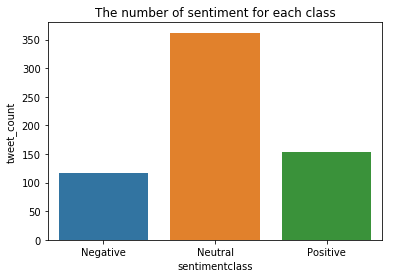

In [32]:
# make a barchar
ax = sns.barplot(x= 'sentimentclass', y='tweet_count', data=chart)
ax = ax.set_title('The number of sentiment for each class') 

##### Pie chart

(-1.1232976226845273,
 1.2353894223534234,
 -1.2733765053794355,
 1.1311808740607352)

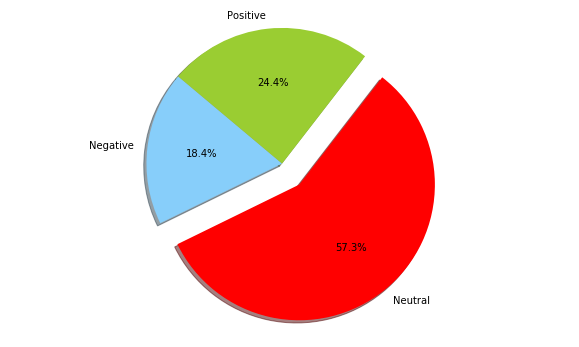

In [33]:
colors = [ 'lightskyblue','red','yellowgreen']
explode = (0, 0.2, 0)  # explode 1st slice
# plot
figure = plt.figure(figsize= (10,6))
plt.pie(chart['tweet_count'], explode=explode, labels=chart['sentimentclass'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

## Sentiment Analysis

### Import Module

In [34]:
# !pip install wordcloud 
# !pip install -U tqdm

In [35]:
import pandas as pd 
import numpy as np 

# import nltk for natural language toolkit
import nltk 
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords


# import string, regex, , uniqcode
import re, string, unicodedata

# import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# import tqdm 
from tqdm import tqdm 

# import beaurtiful soup 
from bs4 import BeautifulSoup

# save model 
import pickle 

# textblob
from textblob import Word

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nirta.yunita07\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Preparation

In [36]:
# import dataset 
dataset = pd.read_csv('trump_twitter.csv')
dataset.head()

,Unnamed: 0,text,sentiment,sentimentclass
0,0,cnni despot dictat go trend senat congress whi...,0.0,Neutral
1,1,astrolog america firstev 1868 httpstcobcmifb90...,0.0,Neutral
2,2,bryanbehar like analog betatest usa constitut,0.0,Neutral
3,3,day final becom preced,0.0,Neutral
4,4,lubonlez anoth day sinc ten thousand californi...,0.0,Neutral


In [37]:
# get text and response 
df = dataset[['text','sentimentclass']]
df.head()

,text,sentimentclass
0,cnni despot dictat go trend senat congress whi...,Neutral
1,astrolog america firstev 1868 httpstcobcmifb90...,Neutral
2,bryanbehar like analog betatest usa constitut,Neutral
3,day final becom preced,Neutral
4,lubonlez anoth day sinc ten thousand californi...,Neutral


### Preprocessing

#### Data cleansing

In [38]:
# cleansing 
def preprocessing(text):
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    def remove_between_square_brackets(text):
        return re.sub('-\[[^]]*\]', '', text)
    def denoise_text(text):
        text = strip_html(text)
        text = remove_between_square_brackets(text)
        return text
    def remove_punctuation(text):
        return re.sub(r'[^\w\s]', '', text)
    def remove_non_ascii(text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_punctuation(text)
    text = remove_non_ascii(text)
    
    return text.lower()

In [39]:
# apply function 
df['text'] = df['text'].apply(preprocessing)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
# stopwords.words('indonesian')

#### Preprocessing

In [41]:
# stopword 
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
# lematization 
df['text']  = df['text'] .apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Data exploration

In [43]:
# count sentiment 
sentiment = df.groupby(['sentimentclass'])['sentimentclass'].count()
sentiment

# make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['sentimentclass']
chart.drop(['sentimentclass'], axis = 1, inplace = True )
chart = chart.reset_index()

# make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,sentimentclass,tweet_count,percent
0,Negative,116,0.183544
1,Neutral,362,0.572785
2,Positive,154,0.243671


##### Barchart

Text(0.5, 1.0, 'Sentiment Class')

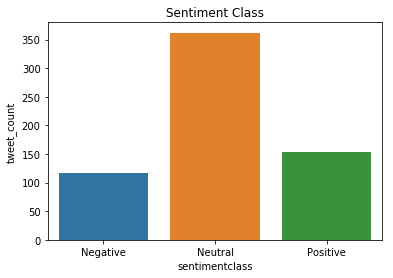

In [44]:
# visualization 
ax = sns.barplot(x= 'sentimentclass', y='tweet_count', data=chart)
ax.set_title('Sentiment Class')

##### Wordcloud

In [45]:
# define positive, neutral, and negative 
positive = df.loc[df['sentimentclass'] == "Positive"]
neutral = df.loc[df['sentimentclass'] == "Neutral"]
negative  = df.loc[df['sentimentclass'] == "Negative"]

In [46]:
# merge all the comments into one paragraph
all_text_positive = "".join(positive.text.values)
all_text_neutral = "".join(neutral.text.values)
all_text_negative = "".join(negative.text.values)

In [47]:
# text = happy.Description
# make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

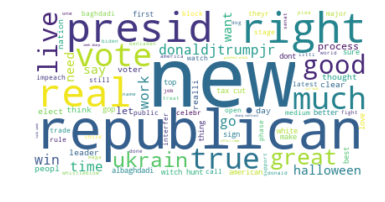

In [48]:
# positive
%matplotlib inline
create_word_cloud(all_text_positive)

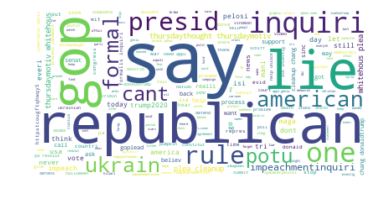

In [49]:
# neutral
create_word_cloud(all_text_neutral)

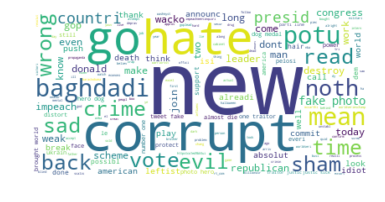

In [50]:
# negative
create_word_cloud(all_text_negative)

### Feature Extraction

#### Count vectorizer

In [51]:
count_vectorizer = CountVectorizer(stop_words='english')

#### TF-IDF vectorizer

In [52]:
tfidf = TfidfVectorizer(stop_words='english')

### Modelling

#### Train-test-split

In [53]:
X = df['text']
y = df['sentimentclass']

In [54]:
# countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

# tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)

In [55]:
# train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.2, random_state=0)

# train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

#### Model machine learning

##### Logistic regression

In [56]:
# count vectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)

D:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [57]:
# TFIDF vectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

##### Naive Bayes

In [58]:
# count vectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)

In [59]:
# TFIDF vectorizer
# from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

#### Model Evaluation

The following option are kind of model evaluation that used.  
- Precision = precision_score()
- Recall = recall_score() 
- F_measure = f1_score()

##### Logistic Regression

In [60]:
# using count vectorizer
print("______________ Countvectorizer ______________")

# Lr_clf_vec_report_train = classification_report(train_y, Lr_pred_vect_train)
# Lr_clf_vec_report_test = classification_report(test_y, Lr_pred_vect_test)

# Lr_confmatrix_vect_train = confusion_matrix(train_y, Lr_pred_vect_train) 
# Lr_confmatrix_vect_test = confusion_matrix(test_y, Lr_pred_vect_test)

Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test,average="micro") 

Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test,average="micro")

Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test,average="micro")

print('Information :')
# print('Confusion matrix for Train :')
# print(Lr_confmatrix_vect_train,'\n')
# print('Confusion matrix for Test :')
# print(Lr_confmatrix_vect_test,'\n')
# print('Classification Refort for Train :')
# print(Lr_clf_vec_report_train,'\n')
# print('Classification Refort for Test :')
# print(Lr_clf_vec_report_test,'\n')
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 100.00% & 63.78%
Precision train & test  : 100.00% & 63.78%
F1 Score train & test   : 100.00% & 63.78%


In [61]:
# using count vectorizer
print("______________ TF-IDF ______________")


Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 69.31% & 55.12%
Precision train & test  : 69.31% & 55.12%
F1 Score train & test   : 69.31% & 63.78%


##### Naive Bayes

In [62]:
# find model evaluation for naive bayes
# using count vectorizer
print("______________ Countvectorizer ______________")


NB_recall_vec_train = recall_score(train_y, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(test_y, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(train_y, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(test_y, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(train_y, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(test_y,NB_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 99.60% & 61.42%
Precision train & test  : 99.60% & 61.42%
F1 Score train & test   : 99.60% & 61.42%


In [63]:
# using count vectorizer
print("______________ TF-IDF ______________")


NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 84.36% & 56.69%
Precision train & test  : 84.36% & 56.69%
F1 Score train & test   : 84.36% & 61.42%


**Conclusion**
<br>The negative and positive class are imbalanced because the data is quite small. It causes an overfitting results shown on both model evaluation.